<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How layers pass data to each other?
Data inputs are processed to be passed to next layer, the calculation include weighted sum of inputs with bias and then Activation function is then applied over it, and its output is passed to next layer as input.

Weighted sum : Z = (W₁X₁ + W₂X₂ + ... + WnXn) + b

Activation function :     A = f(Z) {Sigmoid = 1 / (1 + e^(-x)), etc.}

then A is input for next layer.


### Role of activation function between layers?
Role of Activation function in between layers to implement
*  Non-linearity
*  Control Signal Flow
*  Enable learning


### Why the final layer uses sigmoid in binary output cases?
Sigmoid is used in the final output layer because it outputs its values in range of 0 and 1 which is directly interpreted as probability. This is used in cases like likelyhood predictions for ex spam email detection or cat dog classification.

###  High-Level Workflow:
*  Forward Pass: Predict output
*  Loss Calculation: How far is it from expected?

*  Backpropagation:

  *  Compute gradients of loss w.r.t. weights

  *  Use chain rule to flow error backward

*  Update Weights (via gradient descent)
--------------------------------------------------------------------
Loss Function	- Measures how wrong prediction is

Gradient - Derivative of loss with respect to each weight

Chain Rule - Used to compute gradients layer-by-layer

Optimizer	- Applies gradients to update weights (e.g., SGD, Adam)

## BackPropagation - The Engine of Learning
TL;DR: It’s the method neural networks use to adjust their weights and biases based on the error in output

### What is backpropagation?
Backward propagation is an algorithm which is used to adjust values of parameters (weights and bias) based on outputs, because it works xactly backwards thus justifying its name, adjusts parameter based on output.

### Why do we need loss and gradients?
**Loss** aka cost defines descripency between predicted and actual value, it a term for defining amount of error or failure of model.

**Gradient** : that is derivative of loss wrt to parameters of model, that derives its slope which eventually defines should weight be increased or decreased.

If a gradient is:

*  Positive: Decrease the weight

*  Negative: Increase the weight

*  Zero: No change needed

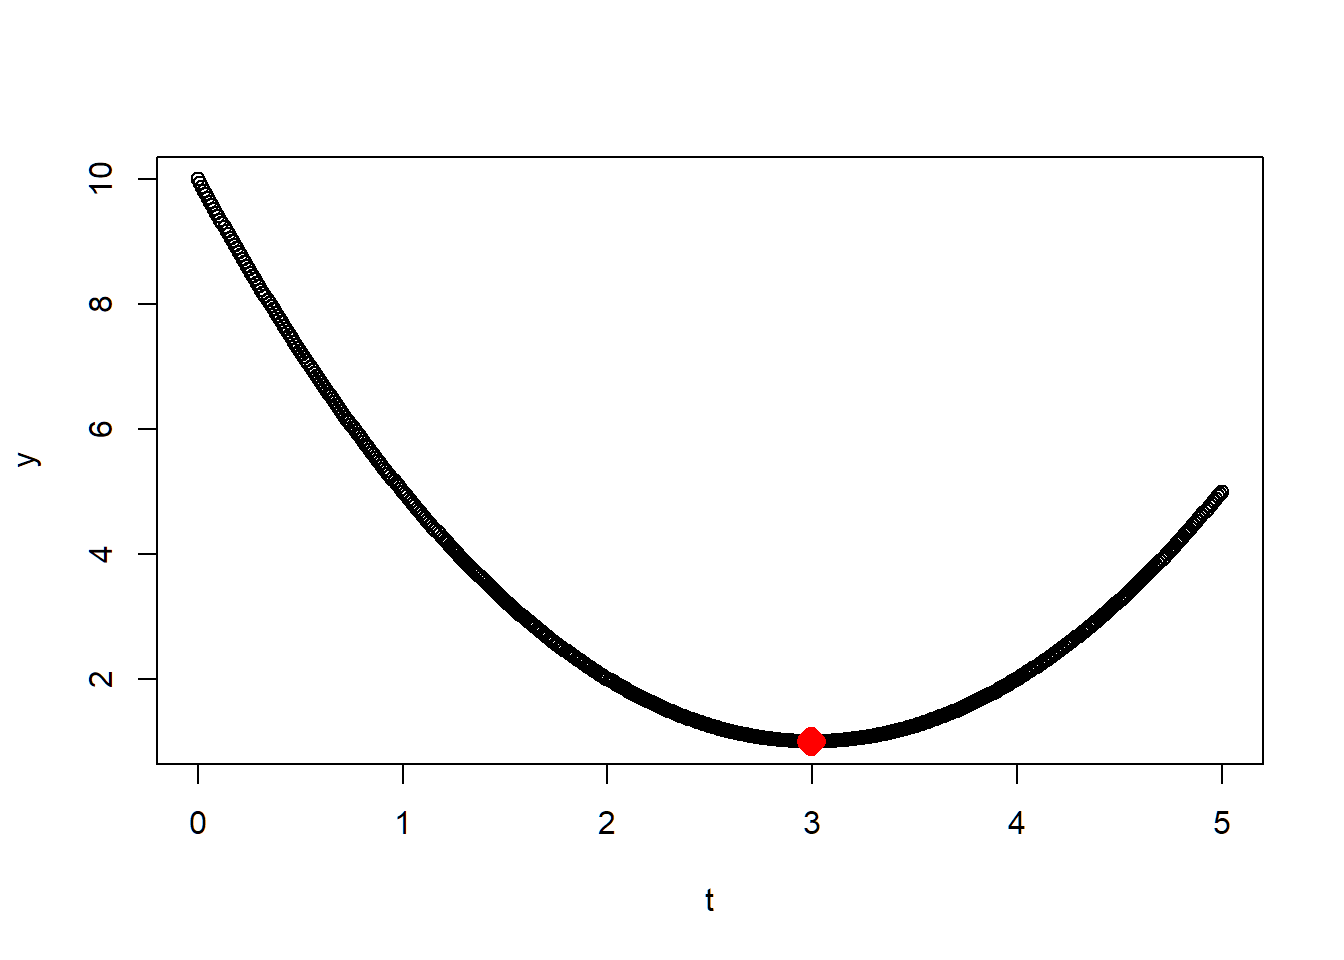

### Observe predictions for XOR — does it learn?

In early neural network models (like a single-layer perceptron), XOR could not be learned. Why?-

Because XOR is not linearly separable.
That means: You can't draw a single straight line to separate the 0s and 1s in XOR's output.

A neural network with at least one hidden layer and nonlinear activation functions can learn XOR.



In [ ]:
import numpy as np
# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
def sigmoid_deriv(x):
    return x * (1 - x)
def relu_deriv(x):
    return np.where(x > 0, 1, 0)

In [ ]:
class DenseLayer:
    def __init__(self, n_inputs, n_neurons, activation='relu'):
        self.weights = np.random.randn(n_neurons, n_inputs) * 0.1  # smaller init to prevent exploding values
        self.biases = np.zeros(n_neurons)
        self.activation_name = activation

    def activate(self, x):
        if self.activation_name == 'sigmoid':
            return sigmoid(x)
        elif self.activation_name == 'relu':
            return relu(x)
        elif self.activation_name == 'softmax':
            return softmax(x)
        else:
            return x  # linear

    def activation_derivative(self, output):
        if self.activation_name == 'sigmoid':
            return sigmoid_deriv(output)  # use output of activation, not z
        elif self.activation_name == 'relu':
            return relu_deriv(output)     # again, pass activated output
        else:
            return np.ones_like(output)

    def forward(self, inputs):
        self.inputs = inputs
        self.z = np.dot(self.weights, inputs) + self.biases
        self.a = self.activate(self.z)
        return self.a

    def backward(self, d_output, learning_rate):
        d_activation = d_output * self.activation_derivative(self.a)
        d_weights = np.outer(d_activation, self.inputs)
        d_biases = d_activation

        self.weights -= learning_rate * d_weights
        self.biases -= learning_rate * d_biases

        return np.dot(self.weights.T, d_activation)


In [ ]:
# Initialize layers
hidden = DenseLayer(n_inputs=2, n_neurons=8, activation='relu')
hidden2 = DenseLayer(n_inputs=8, n_neurons=4, activation='relu')
output = DenseLayer(n_inputs=4, n_neurons=1, activation='sigmoid')


In [ ]:
# Training loop
epochs = 500
learning_rate = 0.1

In [ ]:
# for epoch in range(epochs):
#     total_loss = 0
#     for i in range(len(X)):
#         # Forward pass
#         x_sample = X[i]
#         y_true = y[i]

#         h_out = hidden.forward(x_sample)
#         y_pred = output.forward(h_out)

#         # Loss (mean squared error)
#         loss = 0.5 * (y_pred - y_true) ** 2
#         total_loss += loss

#         # Backward pass
#         d_loss = y_pred - y_true
#         d_hidden = output.backward(d_loss, learning_rate)
#         _ = hidden.backward(d_hidden, learning_rate)

#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}, Loss: {total_loss[0]}")

In [ ]:
epochs = 500
learning_rate = 0.1

for epoch in range(epochs):
    total_loss = 0

    for i in range(len(X)):
        x_sample = X[i]
        y_true = y[i]

        # Forward pass
        h1 = hidden.forward(x_sample)
        h2 = hidden2.forward(h1)
        y_pred = output.forward(h2)

        # Mean Squared Error Loss
        loss = 0.5 * (y_pred - y_true) ** 2
        total_loss += loss

        # Backward pass
        d_loss = y_pred - y_true
        d_h2 = output.backward(d_loss, learning_rate)
        d_h1 = hidden2.backward(d_h2, learning_rate)
        _ = hidden.backward(d_h1, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss[0]}")


Epoch 0, Loss: 0.5028708878302726
Epoch 100, Loss: 0.5025567238630813
Epoch 200, Loss: 0.501676570905703
Epoch 300, Loss: 0.4989781793960404
Epoch 400, Loss: 0.4896730693849348


In [ ]:
print("\nFinal Predictions on XOR:")
for i in range(len(X)):
    h1 = hidden.forward(X[i])
    h2 = hidden2.forward(h1)
    y_pred = output.forward(h2)
    print(f"Input: {X[i]}, Predicted: {y_pred[0]:.4f}, Actual: {y[i][0]}")



Final Predictions on XOR:
Input: [0 0], Predicted: 0.4722, Actual: 0
Input: [0 1], Predicted: 0.5064, Actual: 1
Input: [1 0], Predicted: 0.5935, Actual: 1
Input: [1 1], Predicted: 0.4745, Actual: 0
